<a href="https://colab.research.google.com/github/matiasmimc/Estudio-con-Modelos-predictivos-de-Machine-Learning/blob/main/Alcohol_y_calificaci%C3%B3n_en_matem%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#df =pd.read_csv("/content/drive/MyDrive/Grupo 6 módulo/student-mat.csv")
#data = df

subir student-mat.csv a archivos

In [ ]:
ruta = ('/content/student-mat.csv')
df = pd.read_csv(ruta)

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
cabecera = ["Escuela", "Sexo", "Edad", "Zona", "Familia", "E° padres", "Ed. M", "Ed. P", "Trabajo M", "Trabajo P", "Razón", "Tutela", "t de viaje", "t de estudio", "Repruebos", "Schoolsup", "Ed. en casa", "Clases part.", "Actividades", "Guardería", "ed. sup", "internet", "relación", "relación fam", "t libre", "t fuera", "Alc s", "Alc fds", "Salud", "Ausencias", "N1", "N2", "NF"]
df.columns = cabecera
df.head()

,Escuela,Sexo,Edad,Zona,Familia,E° padres,Ed. M,Ed. P,Trabajo M,Trabajo P,...,relación fam,t libre,t fuera,Alc s,Alc fds,Salud,Ausencias,N1,N2,NF
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
re = df[df["Repruebos"]>=1]
re[re["NF"]>=14]

,Escuela,Sexo,Edad,Zona,Familia,E° padres,Ed. M,Ed. P,Trabajo M,Trabajo P,...,relación fam,t libre,t fuera,Alc s,Alc fds,Salud,Ausencias,N1,N2,NF
151,GP,M,16,U,LE3,T,2,1,at_home,other,...,4,4,4,3,5,5,6,12,13,14
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15


In [ ]:
df.dtypes

Escuela         object
Sexo            object
Edad             int64
Zona            object
Familia         object
E° padres       object
Ed. M            int64
Ed. P            int64
Trabajo M       object
Trabajo P       object
Razón           object
Tutela          object
t de viaje       int64
t de estudio     int64
Repruebos        int64
Schoolsup       object
Ed. en casa     object
Clases part.    object
Actividades     object
Guardería       object
ed. sup         object
internet        object
relación        object
relación fam     int64
t libre          int64
t fuera          int64
Alc s            int64
Alc fds          int64
Salud            int64
Ausencias        int64
N1               int64
N2               int64
NF               int64
dtype: object

In [ ]:
df.describe(include="all")

,Escuela,Sexo,Edad,Zona,Familia,E° padres,Ed. M,Ed. P,Trabajo M,Trabajo P,...,relación fam,t libre,t fuera,Alc s,Alc fds,Salud,Ausencias,N1,N2,NF
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


#Gráficos


GP    0.883544
MS    0.116456
Name: Escuela, dtype: float64


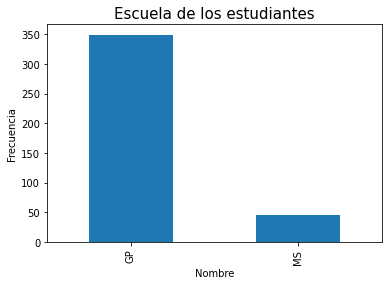

In [ ]:
print(df["Escuela"].value_counts(normalize=True))
fig, ax = plt.subplots()
plt.title('Escuela de los estudiantes',size=15)
plt.xlabel("Nombre")
plt.ylabel("Frecuencia")
df["Escuela"].value_counts().plot(ax=ax, kind="bar")
plt.show()

F    208
M    187
Name: Sexo, dtype: int64


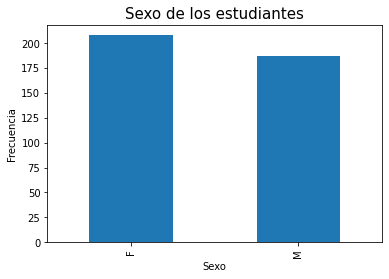

In [ ]:
print(df["Sexo"].value_counts())
fig, ax = plt.subplots()
plt.title('Sexo de los estudiantes',size=15)
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")
df["Sexo"].value_counts().plot(ax=ax, kind="bar")
plt.show()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: Edad, dtype: int64


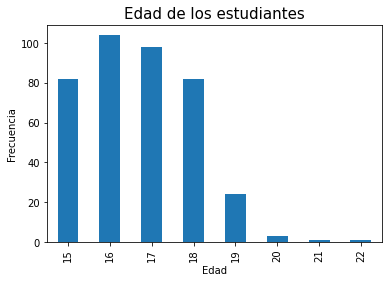

In [ ]:
print(df["Edad"].value_counts())
fig, ax = plt.subplots()
plt.title('Edad de los estudiantes',size=15)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
df["Edad"].value_counts().sort_index().plot(ax=ax, kind="bar")
plt.show()

U    307
R     88
Name: Zona, dtype: int64


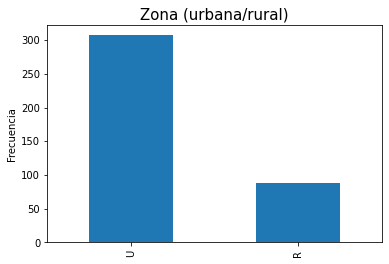

In [ ]:
print(df["Zona"].value_counts())
fig, ax = plt.subplots()
plt.title('Zona (urbana/rural)',size=15)
plt.ylabel("Frecuencia")
df["Zona"].value_counts().plot(ax=ax, kind="bar")
plt.show()

GT3    0.711392
LE3    0.288608
Name: Familia, dtype: float64


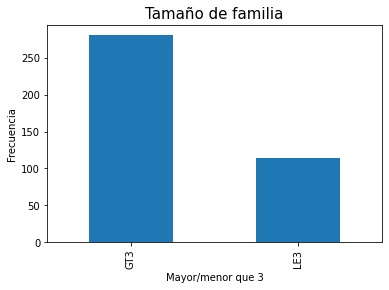

In [ ]:
print(df["Familia"].value_counts(normalize=True))
fig, ax = plt.subplots()
plt.title('Tamaño de familia',size=15)
plt.xlabel("Mayor/menor que 3")
plt.ylabel("Frecuencia")
df["Familia"].value_counts().plot(ax=ax, kind="bar")
plt.show()

T    354
A     41
Name: E° padres, dtype: int64


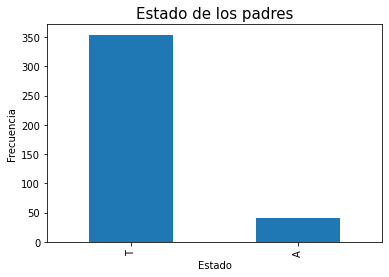

In [ ]:
print(df["E° padres"].value_counts())
fig, ax = plt.subplots()
plt.title('Estado de los padres',size=15)
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
df["E° padres"].value_counts().plot(ax=ax, kind="bar")
plt.show()

4    131
2    103
3     99
1     59
0      3
Name: Ed. M, dtype: int64


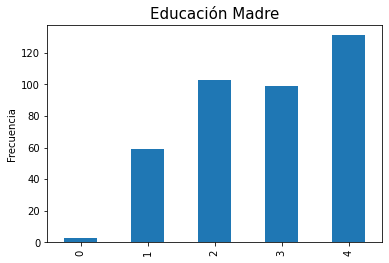

In [ ]:
print(df["Ed. M"].value_counts())
fig, ax = plt.subplots()
plt.title('Educación Madre',size=15)
plt.ylabel("Frecuencia")
df["Ed. M"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

2    115
3    100
4     96
1     82
0      2
Name: Ed. P, dtype: int64


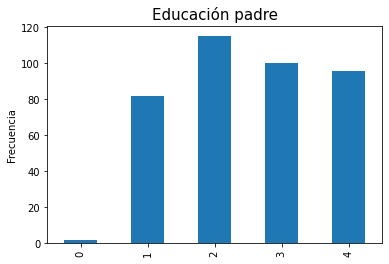

In [ ]:
print(df["Ed. P"].value_counts())
fig, ax = plt.subplots()
plt.title('Educación padre',size=15)
plt.ylabel("Frecuencia")
df["Ed. P"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Trabajo M, dtype: int64


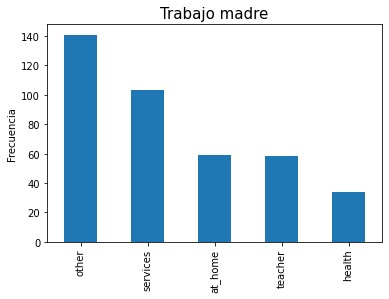

In [ ]:
print(df["Trabajo M"].value_counts())
fig, ax = plt.subplots()
plt.title('Trabajo madre',size=15)
plt.ylabel("Frecuencia")
df["Trabajo M"].value_counts().plot(ax=ax ,kind="bar")
plt.show()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Trabajo P, dtype: int64


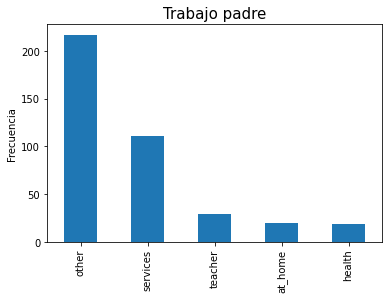

In [ ]:
print(df["Trabajo P"].value_counts())
fig, ax = plt.subplots()
plt.title('Trabajo padre',size=15)
plt.ylabel("Frecuencia")
df["Trabajo P"].value_counts().plot(ax=ax ,kind="bar")
plt.show()

course        0.367089
home          0.275949
reputation    0.265823
other         0.091139
Name: Razón, dtype: float64


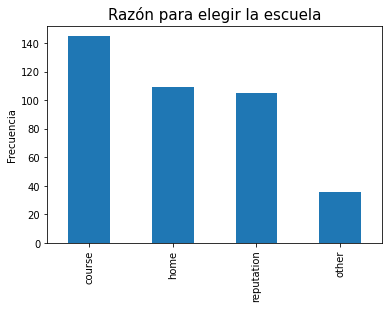

In [ ]:
print(df["Razón"].value_counts(normalize=True))
fig, ax = plt.subplots()
plt.title('Razón para elegir la escuela',size=15)
plt.ylabel("Frecuencia")
df["Razón"].value_counts().plot(ax=ax ,kind="bar")
plt.show()

mother    273
father     90
other      32
Name: Tutela, dtype: int64


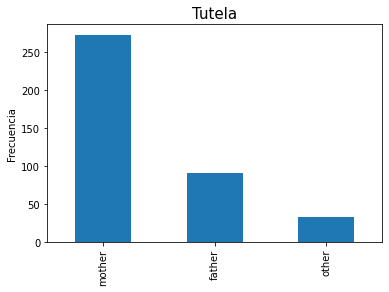

In [ ]:
print(df["Tutela"].value_counts())
fig, ax = plt.subplots()
plt.title('Tutela',size=15)
plt.ylabel("Frecuencia")
df["Tutela"].value_counts().plot(ax=ax ,kind="bar")
plt.show()

1    257
2    107
3     23
4      8
Name: t de viaje, dtype: int64


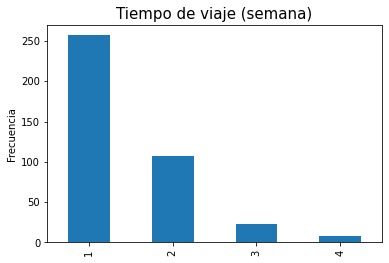

In [ ]:
print(df["t de viaje"].value_counts())
fig, ax = plt.subplots()
plt.title('Tiempo de viaje (semana)',size=15)
plt.ylabel("Frecuencia")
df["t de viaje"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

2    198
1    105
3     65
4     27
Name: t de estudio, dtype: int64


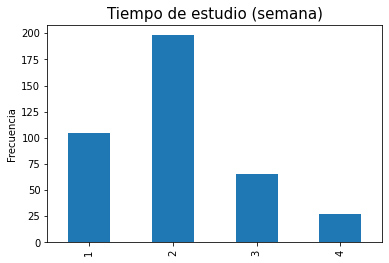

In [ ]:
print(df["t de estudio"].value_counts())
fig, ax = plt.subplots()
plt.title('Tiempo de estudio (semana)',size=15)
plt.ylabel("Frecuencia")
df["t de estudio"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

0    312
1     50
2     17
3     16
Name: Repruebos, dtype: int64


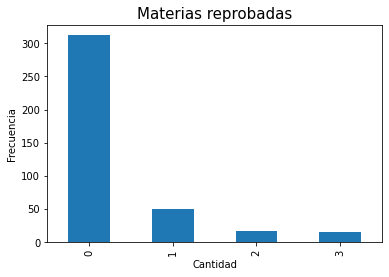

In [ ]:
print(df["Repruebos"].value_counts())
fig, ax = plt.subplots()
plt.title('Materias reprobadas',size=15)
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
df["Repruebos"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

no     344
yes     51
Name: Schoolsup, dtype: int64


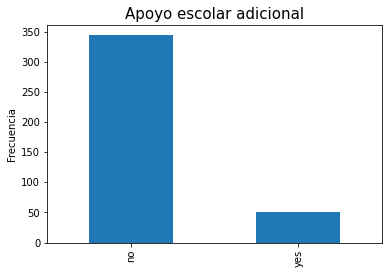

In [ ]:
print(df["Schoolsup"].value_counts())
fig, ax = plt.subplots()
plt.title('Apoyo escolar adicional',size=15)
plt.ylabel("Frecuencia")
df["Schoolsup"].value_counts().plot(ax=ax ,kind="bar")
plt.show()

yes    242
no     153
Name: Ed. en casa, dtype: int64


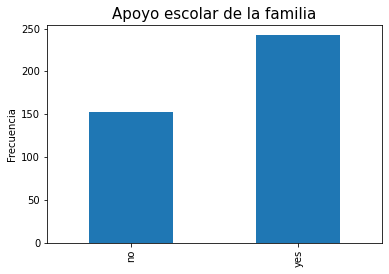

In [ ]:
print(df["Ed. en casa"].value_counts())
fig, ax = plt.subplots()
plt.title('Apoyo escolar de la familia',size=15)
plt.ylabel("Frecuencia")
df["Ed. en casa"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

no     214
yes    181
Name: Clases part., dtype: int64


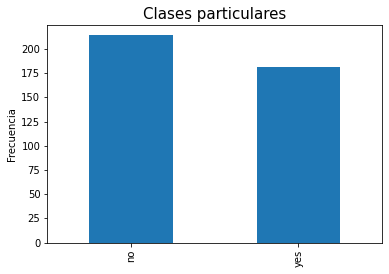

In [ ]:
print(df["Clases part."].value_counts())
fig, ax = plt.subplots()
plt.title('Clases particulares',size=15)
plt.ylabel("Frecuencia")
df["Clases part."].value_counts().plot(ax=ax ,kind="bar")
plt.show()

yes    201
no     194
Name: Actividades, dtype: int64


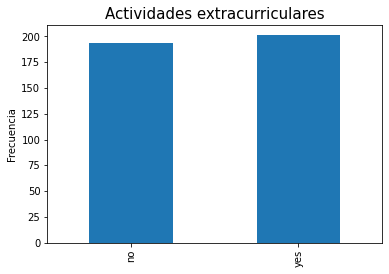

In [ ]:
print(df["Actividades"].value_counts())
fig, ax = plt.subplots()
plt.title('Actividades extracurriculares',size=15)
plt.ylabel("Frecuencia")
df["Actividades"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

yes    314
no      81
Name: Guardería, dtype: int64


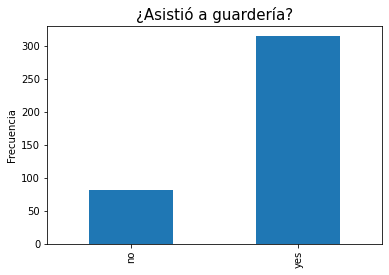

In [ ]:
print(df["Guardería"].value_counts())
fig, ax = plt.subplots()
plt.title('¿Asistió a guardería?',size=15)
plt.ylabel("Frecuencia")
df["Guardería"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

yes    0.949367
no     0.050633
Name: ed. sup, dtype: float64


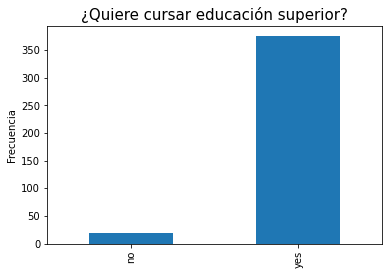

In [ ]:
print(df["ed. sup"].value_counts(normalize=True))
fig, ax = plt.subplots()
plt.title('¿Quiere cursar educación superior?',size=15)
plt.ylabel("Frecuencia")
df["ed. sup"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

yes    329
no      66
Name: internet, dtype: int64


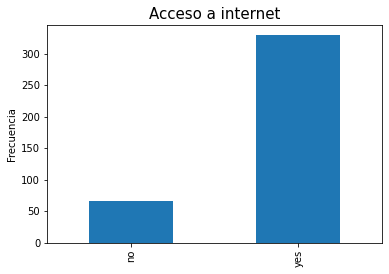

In [ ]:
print(df["internet"].value_counts())
fig, ax = plt.subplots()
plt.title('Acceso a internet',size=15)
plt.ylabel("Frecuencia")
df["internet"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

no     263
yes    132
Name: relación, dtype: int64


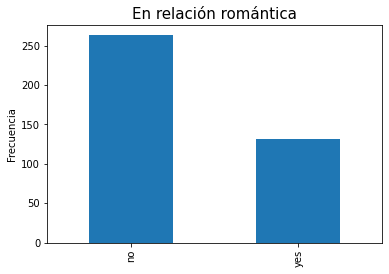

In [ ]:
print(df["relación"].value_counts())
fig, ax = plt.subplots()
plt.title('En relación romántica',size=15)
plt.ylabel("Frecuencia")
df["relación"].value_counts().plot(ax=ax ,kind="bar")
plt.show()

4    195
5    106
3     68
2     18
1      8
Name: relación fam, dtype: int64


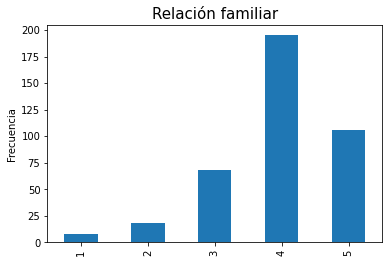

In [ ]:
print(df["relación fam"].value_counts())
fig, ax = plt.subplots()
plt.title('Relación familiar',size=15)
plt.ylabel("Frecuencia")
df["relación fam"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

3    157
4    115
2     64
5     40
1     19
Name: t libre, dtype: int64


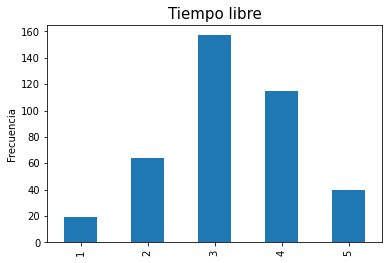

In [ ]:
print(df["t libre"].value_counts())
fig, ax = plt.subplots()
plt.title('Tiempo libre',size=15)
plt.ylabel("Frecuencia")
df["t libre"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

3    130
2    103
4     86
5     53
1     23
Name: t fuera, dtype: int64


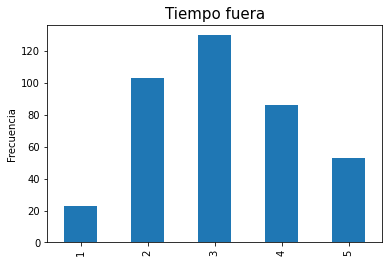

In [ ]:
print(df["t fuera"].value_counts())
fig, ax = plt.subplots()
plt.title('Tiempo fuera',size=15)
plt.ylabel("Frecuencia")
df["t fuera"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

1    276
2     75
3     26
5      9
4      9
Name: Alc s, dtype: int64


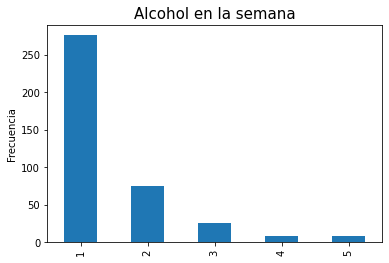

In [ ]:
print(df["Alc s"].value_counts())
fig, ax = plt.subplots()
plt.title('Alcohol en la semana',size=15)
plt.ylabel("Frecuencia")
df["Alc s"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

1    151
2     85
3     80
4     51
5     28
Name: Alc fds, dtype: int64


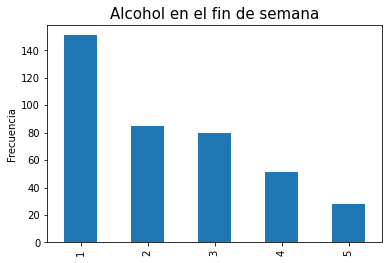

In [ ]:
print(df["Alc fds"].value_counts())
fig, ax = plt.subplots()
plt.title('Alcohol en el fin de semana',size=15)
plt.ylabel("Frecuencia")
df["Alc fds"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

5    146
3     91
4     66
1     47
2     45
Name: Salud, dtype: int64


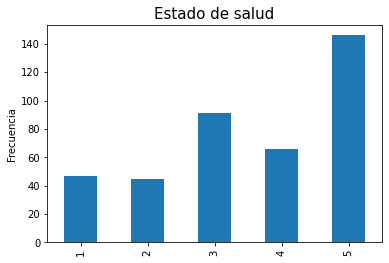

In [ ]:
print(df["Salud"].value_counts())
fig, ax = plt.subplots()
plt.title('Estado de salud',size=15)
plt.ylabel("Frecuencia")
df["Salud"].value_counts().sort_index().plot(ax=ax ,kind="bar")
plt.show()

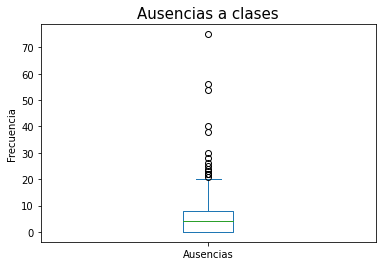

In [ ]:
fig, ax = plt.subplots()
plt.title('Ausencias a clases',size=15)
plt.ylabel("Frecuencia")
df["Ausencias"].plot(ax=ax ,kind="box")
plt.show()

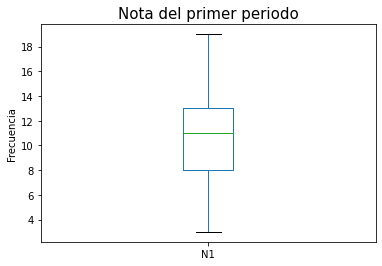

In [ ]:
fig, ax = plt.subplots()
plt.title('Nota del primer periodo',size=15)
plt.ylabel("Frecuencia")
df.boxplot(column = "N1", grid=False)
plt.show()

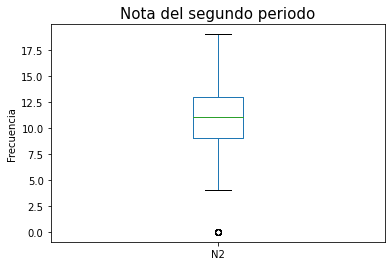

In [ ]:
fig, ax = plt.subplots()
plt.title('Nota del segundo periodo',size=15)
plt.ylabel("Frecuencia")
df.boxplot(column = "N2", grid=False)
plt.show()

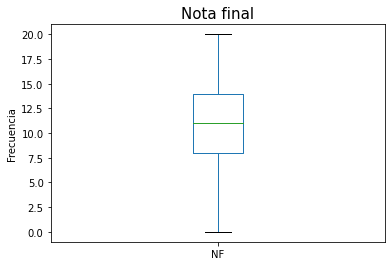

In [ ]:
fig, ax = plt.subplots()
plt.title('Nota final',size=15)
plt.ylabel("Frecuencia")
df.boxplot(column = "NF", grid=False)
plt.show()

# Matríz de características

In [ ]:
listae = df["Escuela"]
for i in range(0,len(listae)):
  if listae[i] == "GP":
    listae[i] = 0
  else :
    listae[i] = 1
df["Escuela"] = listae
df["Escuela"] = df["Escuela"].astype(str).astype(int)

0 = GP

1 = MS

In [ ]:
listas = df["Sexo"]
for i in range(0,len(listas)):
  if listas[i] == "F":
    listas[i] = 0
  else :
    listas[i] = 1
df["Sexo"] = listas
df["Sexo"] = df["Sexo"].astype(str).astype(int)

0 = F

1 = M

In [ ]:
listaz = df["Zona"]
for i in range(0,len(listaz)):
  if listaz[i] == "U":
    listaz[i] = 0
  else :
    listaz[i] = 1
df["Zona"] = listaz
df["Zona"] = df["Zona"].astype(str).astype(int)

0 = U

1 = R

In [ ]:
listaf = df["Familia"]
for i in range(0,len(listaf)):
  if listaf[i] == "LT3":
    listaf[i] = 0
  else :
    listaf[i] = 1
df["Familia"] = listaf
df["Familia"] = df["Familia"].astype(str).astype(int)

LT3 = 0

GT3 = 1

In [ ]:
listap = df["E° padres"]
for i in range(0,len(listap)):
  if listap[i] == "T":
    listap[i] = 0
  else :
    listap[i] = 1
df["E° padres"] = listap
df["E° padres"] = df["E° padres"].astype(str).astype(int)

T = 0

A = 1

In [ ]:
listatm = df["Trabajo M"]
for i in range(0,len(listatm)):
  if listatm[i] == "at_home":
    listatm[i] = 0
  elif listatm[i] == "teacher":
    listatm[i] = 1
  elif listatm[i] == "services":
    listatm[i] = 2
  elif listatm[i] == "health":
    listatm[i] = 3
  else:
    listatm[i] = 4
df["Trabajo M"] = listatm
df["Trabajo M"] = df["Trabajo M"].astype(str).astype(int)

In [ ]:
listatp = df["Trabajo P"]
for i in range(0,len(listatp)):
  if listatp[i] == "at_home":
    listatp[i] = 0
  elif listatp[i] == "teacher":
    listatp[i] = 1
  elif listatp[i] == "services":
    listatp[i] = 2
  elif listatp[i] == "health":
    listatp[i] = 3
  else:
    listatp[i] = 4
df["Trabajo P"] = listatp
df["Trabajo P"] = df["Trabajo P"].astype(str).astype(int)

at home = 0

teacher = 1

services = 2

health = 3

other = 4

In [ ]:
listar = df["Razón"]
for i in range(0,len(listar)):
  if listar[i] == "home":
    listar[i] = 0
  elif listar[i] == "reputation":
    listar[i] = 1
  elif listar[i] == "course":
    listar[i] = 2
  elif listar[i] == "other":
    listar[i] = 3
df["Razón"] = listar
df["Razón"] = df["Razón"].astype(str).astype(int)

In [ ]:
listatu = df["Tutela"]
for i in range(0,len(listatu)):
  if listatu[i] == "mother":
    listatu[i] = 0
  elif listatu[i] == "father":
    listatu[i] = 1
  elif listatu[i] == "other":
    listatu[i] = 2
df["Tutela"] = listatu
df["Tutela"] = df["Tutela"].astype(str).astype(int)

In [ ]:
listaed = df["Schoolsup"]
for i in range(0,len(listaed)):
  if listaed[i] == "yes":
    listaed[i] = 0
  else :
    listaed[i] = 1
df["Schoolsup"] = listaed
df["Schoolsup"] = df["Schoolsup"].astype(str).astype(int)

In [ ]:
lista1 = df["Ed. en casa"]
for i in range(0,len(lista1)):
  if lista1[i] == "yes":
    lista1[i] = 0
  else :
    lista1[i] = 1
df["Ed. en casa"] = lista1
df["Ed. en casa"] = df["Ed. en casa"].astype(str).astype(int)

In [ ]:
lista2 = df["Clases part."]
for i in range(0,len(lista2)):
  if lista2[i] == "yes":
    lista2[i] = 0
  else :
    lista2[i] = 1
df["Clases part."] = lista2
df["Clases part."] = df["Clases part."].astype(str).astype(int)

In [ ]:
lista3 = df["Actividades"]
for i in range(0,len(lista3)):
  if lista3[i] == "yes":
    lista3[i] = 0
  else :
    lista3[i] = 1
df["Actividades"] = lista3
df["Actividades"] = df["Actividades"].astype(str).astype(int)

In [ ]:
lista4 = df["Guardería"]
for i in range(0,len(lista4)):
  if lista4[i] == "yes":
    lista4[i] = 0
  else :
    lista4[i] = 1
df["Guardería"] = lista4
df["Guardería"] = df["Guardería"].astype(str).astype(int)

In [ ]:
lista5 = df["ed. sup"]
for i in range(0,len(lista5)):
  if lista5[i] == "yes":
    lista5[i] = 0
  else :
    lista5[i] = 1
df["ed. sup"] = lista5
df["ed. sup"] = df["ed. sup"].astype(str).astype(int)

In [ ]:
lista6 = df["internet"]
for i in range(0,len(lista6)):
  if lista6[i] == "yes":
    lista6[i] = 0
  else :
    lista6[i] = 1
df["internet"] = lista6
df["internet"] = df["internet"].astype(str).astype(int)

In [ ]:
lista7 = df["relación"]
for i in range(0,len(lista7)):
  if lista7[i] == "yes":
    lista7[i] = 0
  else :
    lista7[i] = 1
df["relación"] = lista7
df["relación"] = df["relación"].astype(str).astype(int)

# Definir Matríz de Características


Crear columnas

In [ ]:
df["Apoyo adicional"] = df["Schoolsup"] + df["Ed. en casa"]
df["Eficiencia"] = (df["t de estudio"])/(df["t libre"])

Eliminar columnas

In [ ]:
del df["E° padres"]
del df["Ed. M"]
del df['Ed. P']
del df['Trabajo M']
del df['Trabajo P']
del df['Razón']
del df['Tutela']
del df['t de viaje']
del df['t de estudio']
del df['Schoolsup']
del df['Ed. en casa']
del df['Actividades']
del df['Guardería']
del df['ed. sup']
del df['internet']
del df['relación']
del df['relación fam']
del df['t libre']
del df['Salud']

In [ ]:
MC = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Escuela          395 non-null    int64  
 1   Sexo             395 non-null    int64  
 2   Edad             395 non-null    int64  
 3   Zona             395 non-null    int64  
 4   Familia          395 non-null    int64  
 5   Repruebos        395 non-null    int64  
 6   Clases part.     395 non-null    int64  
 7   t fuera          395 non-null    int64  
 8   Alc s            395 non-null    int64  
 9   Alc fds          395 non-null    int64  
 10  Ausencias        395 non-null    int64  
 11  N1               395 non-null    int64  
 12  N2               395 non-null    int64  
 13  NF               395 non-null    int64  
 14  Apoyo adicional  395 non-null    int64  
 15  Eficiencia       395 non-null    float64
dtypes: float64(1), int64(15)
memory usage: 49.5 KB


In [ ]:
MC

,Escuela,Sexo,Edad,Zona,Familia,Repruebos,Clases part.,t fuera,Alc s,Alc fds,Ausencias,N1,N2,NF,Apoyo adicional,Eficiencia
0,0,0,18,0,1,0,1,4,1,1,6,5,6,6,1,0.666667
1,0,0,17,0,1,0,1,3,1,1,4,5,5,6,1,0.666667
2,0,0,15,0,1,3,0,2,2,3,10,7,8,10,1,0.666667
3,0,0,15,0,1,0,0,2,1,1,2,15,14,15,1,1.500000
4,0,0,16,0,1,0,0,2,1,2,4,6,10,10,1,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,2,0,4,4,5,11,9,9,9,1,0.400000
391,1,1,17,0,1,0,1,5,3,4,3,14,16,16,2,0.250000
392,1,1,21,1,1,3,1,3,3,3,3,10,8,7,2,0.200000
393,1,1,18,1,1,0,1,1,3,4,0,11,12,10,2,0.250000


#Pregunta:

¿Cuál será el rendimiento de un alumno en la nota final? ¿Hay  relación del consumo de alcohol de los estudiantes con su rendimiento académico?

# Importar librerías

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Primera matríz

Definir X e Y

In [ ]:
caracteristicas = ["Escuela", "Sexo", "Edad", "Zona", "Familia", "Repruebos", "Clases part.", "t fuera", "Alc s", "Alc fds", "Ausencias", "N1", "N2", "Apoyo adicional", "Eficiencia"]

In [ ]:
X = MC.loc[:,caracteristicas].to_numpy()

In [ ]:
etiqueta = ['NF']
Y = MC.loc[:,etiqueta].to_numpy()

## Árbol de desición


In [ ]:
#separar datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
ad = DecisionTreeClassifier(max_depth = 6)
#entrenar
ad.fit(X_train, y_train)
#predicción
Y_pred = ad.predict(X_test)

In [ ]:
with open("mi_arbol1.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=caracteristicas)

In [ ]:
!dot -Tjpeg mi_arbol1.dot -o arbol_decision1.png

Metricas de regresión

In [ ]:
MSE = mean_squared_error(y_test, Y_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y_test, Y_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y_test - Y_pred) / y_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 4.424242424242424
RMSE: 2.1033883198882757
MAE: 1.0909090909090908
MAPE: nan


## Random forest

In [ ]:
#separar datos
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
rf = RandomForestClassifier()
#ajustar
rf.fit(X, Y)
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((Y == rf.predict(X)).mean()))
Y2_pred = ad.predict(X2_test)

precisión del modelo:  0.08


In [ ]:
MSE = mean_squared_error(y2_test, Y2_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y2_test, Y2_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y2_test - Y2_pred) / y2_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 0.6767676767676768
RMSE: 0.8226589066968623
MAE: 0.41414141414141414
MAPE: nan


# Validación cruzada

In [ ]:
import numpy as np
from sklearn import datasets
import warnings
warnings.simplefilter('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ad_cv = cross_val_score(DecisionTreeRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')

In [ ]:
ad_cv

array([-0.85      , -1.075     , -1.025     , -1.775     , -1.2       ,
       -0.66666667, -1.05128205, -0.74358974, -1.41025641, -0.76923077])

In [ ]:
np.mean(-1*ad_cv)

1.056602564102564

In [ ]:
rf_cv = cross_val_score(RandomForestRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')

In [ ]:
np.mean(-1*rf_cv)

1.0123307692307693

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

In [ ]:
ad_cv = cross_val_score(DecisionTreeRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')
rf_cv = cross_val_score(RandomForestRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')
ab_cv = cross_val_score(AdaBoostRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')
gb_cv = cross_val_score(GradientBoostingRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')
svr_cv = cross_val_score(SVR(), X, Y, cv=10, scoring='neg_mean_absolute_error')
sgd_cv = cross_val_score(SGDRegressor(), X, Y, cv=10, scoring='neg_mean_absolute_error')
kr_cv = cross_val_score(KernelRidge(), X, Y, cv=10, scoring='neg_mean_absolute_error')
en_cv = cross_val_score(ElasticNet(), X, Y, cv=10, scoring='neg_mean_absolute_error')
br_cv = cross_val_score(BayesianRidge(), X, Y, cv=10, scoring='neg_mean_absolute_error')

In [ ]:
print("AD: " + str(np.round(np.mean(-1*ad_cv),2)))
print("RF: " + str(np.round(np.mean(-1*rf_cv),2)))
print("AB: " + str(np.round(np.mean(-1*ab_cv),2)))
print("GB: " + str(np.round(np.mean(-1*gb_cv),2)))
print("SVR: " + str(np.round(np.mean(-1*svr_cv),2)))
print("SGD: " + str(np.round(np.mean(-1*sgd_cv),2)))
print("KR: " + str(np.round(np.mean(-1*kr_cv),2)))
print("EN: " + str(np.round(np.mean(-1*en_cv),2)))
print("BR: " + str(np.round(np.mean(-1*br_cv),2)))

AD: 1.11
RF: 1.03
AB: 1.25
GB: 1.15
SVR: 1.23
SGD: 101959517.28
KR: 1.25
EN: 1.14
BR: 1.22


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# Random Forest
modelo1 = RandomForestRegressor()
modelo1.fit(X_train, y_train)
modelo1_y_pred = modelo1.predict(X_test)

# DesicionTree
modelo2 = DecisionTreeRegressor()
modelo2.fit(X_train, y_train)
modelo2_y_pred = modelo2.predict(X_test)

# Gradient Boosting
modelo3 = GradientBoostingRegressor()
modelo3.fit(X_train, y_train)
modelo3_y_pred = modelo3.predict(X_test)

In [ ]:
preds = [np.mean([p1, p2, p3]) for (p1, p2, p3) in zip(modelo1_y_pred, modelo2_y_pred, modelo3_y_pred)]
preds_ensamble = preds

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Random Forest:")
print(f"  MSE             : {round(mean_squared_error(y_test, modelo1_y_pred), 2)}")
print(f"  RMSE            : {round((mean_squared_error(y_test, modelo1_y_pred)**0.5), 2)}")
print(f"  MAE             : {round(mean_absolute_error(y_test, modelo1_y_pred), 2)}")
print(f"  MAPE            : {round(np.mean(np.abs((y_test - modelo1_y_pred) / y_test)) * 100, 2)}")

print("Desicion Tree:")
print(f"  MSE             : {round(mean_squared_error(y_test, modelo2_y_pred), 2)}")
print(f"  RMSE            : {round((mean_squared_error(y_test, modelo2_y_pred)**0.5), 2)}")
print(f"  MAE             : {round(mean_absolute_error(y_test, modelo2_y_pred), 2)}")
print(f"  MAPE            : {round(np.mean(np.abs((y_test - modelo2_y_pred) / y_test)) * 100, 2)}")

print("Gradient Boosting:")
print(f"  MSE             : {round(mean_squared_error(y_test, modelo3_y_pred), 2)}")
print(f"  RMSE            : {round((mean_squared_error(y_test, modelo3_y_pred)**0.5), 2)}")
print(f"  MAE             : {round(mean_absolute_error(y_test, modelo3_y_pred), 2)}")
print(f"  MAPE            : {round(np.mean(np.abs((y_test - modelo3_y_pred) / y_test)) * 100, 2)}")

print("-----------------------------")

print("Modelo Ensamble:")
print(f"  MSE             : {round(mean_squared_error(y_test, preds_ensamble), 2)}")
print(f"  RMSE            : {round((mean_squared_error(y_test, preds_ensamble)**0.5), 2)}")
print(f"  MAE             : {round(mean_absolute_error(y_test, preds_ensamble), 2)}")
print(f"  MAPE            : {round(np.mean(np.abs((y_test - preds_ensamble) / y_test)) * 100, 2)}")

Random Forest:
  MSE             : 1.52
  RMSE            : 1.23
  MAE             : 0.88
  MAPE            : inf
Desicion Tree:
  MSE             : 1.52
  RMSE            : 1.23
  MAE             : 0.85
  MAPE            : nan
Gradient Boosting:
  MSE             : 1.9
  RMSE            : 1.38
  MAE             : 0.96
  MAPE            : inf
-----------------------------
Modelo Ensamble:
  MSE             : 1.23
  RMSE            : 1.11
  MAE             : 0.81
  MAPE            : inf


# Segunda matríz

Matriz de características sin datos de consumo de alcohol

In [ ]:
caracteristicas = ["Escuela", "Sexo", "Edad", "Zona", "Familia", "Repruebos", "Clases part.", "t fuera", "Ausencias", "N1", "N2", "Apoyo adicional", "Eficiencia"]

In [ ]:
X = MC.loc[:,caracteristicas].to_numpy()

In [ ]:
etiqueta = ['NF']
Y = MC.loc[:,etiqueta].to_numpy()

## Árbol de desición

In [ ]:
#separar datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
ad = DecisionTreeClassifier(max_depth = 6)
#entrenar
ad.fit(X_train, y_train)
#predicción
Y_pred = ad.predict(X_test)

In [ ]:
with open("mi_arbol2.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=caracteristicas)

In [ ]:
!dot -Tjpeg mi_arbol2.dot -o arbol_decision2.png

In [ ]:
MSE = mean_squared_error(y_test, Y_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y_test, Y_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y_test - Y_pred) / y_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 5.929292929292929
RMSE: 2.435013948480158
MAE: 1.1818181818181819
MAPE: nan


## Random forest

In [ ]:
#separar datos
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
rf = RandomForestClassifier()
#ajustar
rf.fit(X, Y)
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((Y == rf.predict(X)).mean()))
Y2_pred = ad.predict(X2_test)

precisión del modelo:  0.08


In [ ]:
MSE = mean_squared_error(y2_test, Y2_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y2_test, Y2_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y2_test - Y2_pred) / y2_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 1.9292929292929293
RMSE: 1.3889898953170716
MAE: 0.5757575757575758
MAPE: nan


# Tercera matríz

Solo datos escolares (además de la llave)

La mejor según la métrica del árbol de desición

In [ ]:
caracteristicas = ["Escuela", "Sexo", "Edad", "Zona", "Repruebos", "Clases part.", "Ausencias", "N1", "N2", "Apoyo adicional", "Eficiencia"]

In [ ]:
X = MC.loc[:,caracteristicas].to_numpy()

In [ ]:
etiqueta = ['NF']
Y = MC.loc[:,etiqueta].to_numpy()

## Árbol de desición

In [ ]:
#separar datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
ad = DecisionTreeClassifier(max_depth = 6)
#entrenar
ad.fit(X_train, y_train)
#predicción
Y_pred = ad.predict(X_test)

In [ ]:
with open("mi_arbol3.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=caracteristicas)

In [ ]:
!dot -Tjpeg mi_arbol3.dot -o arbol_decision3.png

In [ ]:
MSE = mean_squared_error(y_test, Y_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y_test, Y_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y_test - Y_pred) / y_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 2.3434343434343434
RMSE: 1.5308279927654653
MAE: 0.8080808080808081
MAPE: nan


## Random forest

In [ ]:
#separar datos
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
rf = RandomForestClassifier()
#ajustar
rf.fit(X, Y)
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((Y == rf.predict(X)).mean()))
Y2_pred = ad.predict(X2_test)

precisión del modelo:  0.08


In [ ]:
MSE = mean_squared_error(y2_test, Y2_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y2_test, Y2_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y2_test - Y2_pred) / y2_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 2.606060606060606
RMSE: 1.6143297699232972
MAE: 0.7070707070707071
MAPE: nan


# Cuarta matríz

Solo con la llave y el consumo de alcohol.

La métrica de ambos modelos se dispara, por lo que la relación es ambigua y no podemos concluir causalidad.

In [ ]:
caracteristicas = ["Escuela", "Sexo", "Edad", "Zona", "Alc s", "Alc fds"]

In [ ]:
X = MC.loc[:,caracteristicas].to_numpy()

In [ ]:
etiqueta = ['NF']
Y = MC.loc[:,etiqueta].to_numpy()

## Árbol de desición

In [ ]:
#separar datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
ad = DecisionTreeClassifier(max_depth = 6)
#entrenar
ad.fit(X_train, y_train)
#predicción
Y_pred = ad.predict(X_test)

In [ ]:
with open("mi_arbol4.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=caracteristicas)

In [ ]:
!dot -Tjpeg mi_arbol4.dot -o arbol_decision4.png

In [ ]:
MSE = mean_squared_error(y_test, Y_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y_test, Y_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y_test - Y_pred) / y_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 33.54545454545455
RMSE: 5.791843794980537
MAE: 4.313131313131313
MAPE: nan


## Random forest

In [ ]:
#separar datos
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#crear
rf = RandomForestClassifier()
#ajustar
rf.fit(X, Y)
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((Y == rf.predict(X)).mean()))
Y2_pred = ad.predict(X2_test)

precisión del modelo:  0.09


In [ ]:
MSE = mean_squared_error(y2_test, Y2_pred)
print("MSE: " + str(MSE))
RMSE = MSE**0.5
print("RMSE: " + str(RMSE))
MAE = mean_absolute_error(y2_test, Y2_pred)
print("MAE: " + str(MAE))
MAPE = np.mean(np.abs((y2_test - Y2_pred) / y2_test)) * 100
print("MAPE: " + str(MAPE))

MSE: 24.666666666666668
RMSE: 4.96655480858378
MAE: 3.3535353535353534
MAPE: nan
